In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt


In [2]:
with open('lettres1.pkl', 'rb') as f:
    data = pkl.load(f, encoding='latin1') 
X = np.array(data.get('letters')) # récupération des données sur les lettres
Y = np.array(data.get('labels')) # récupération des étiquettes associées 

In [3]:
# affichage d'une lettre
def tracerLettre(let):
    a= -let*np.pi/180; # conversion en rad
    coord = np.array([[0, 0]]); # point initial
    for i in range(len(a)):
        x = np.array([[1, 0]]);
        rot = np.array([[np.cos(a[i]), -np.sin(a[i])],[ np.sin(a[i]),np.cos(a[i])]])
        xr = x.dot(rot) # application de la rotation
        coord = np.vstack((coord,xr+coord[-1,:]))
        plt.figure()
        plt.plot(coord[:,0],coord[:,1])
    plt.savefig("exlettre.png")
    plt.show()
    return

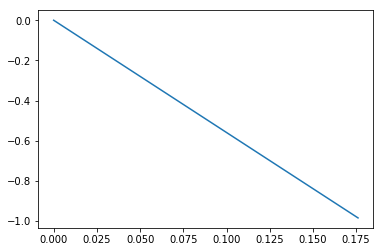

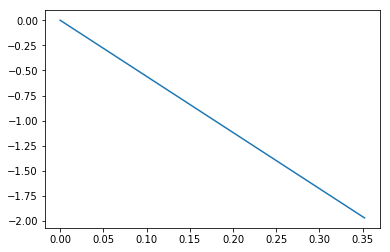

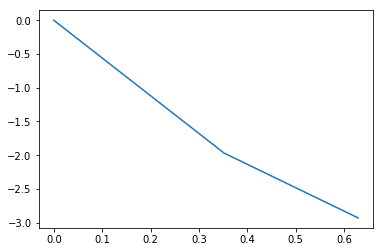

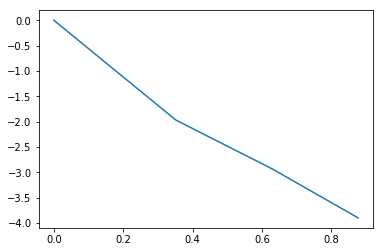

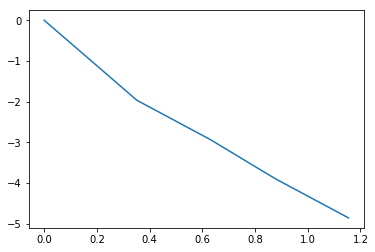

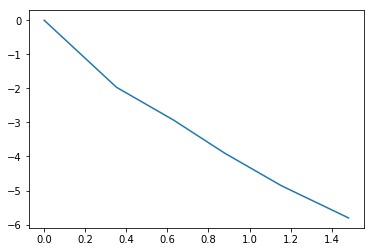

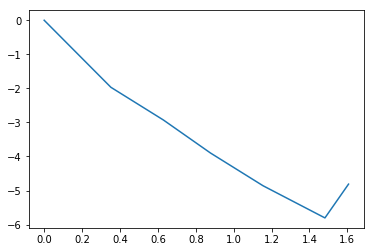

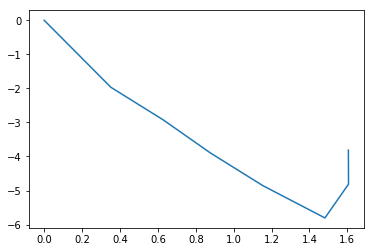

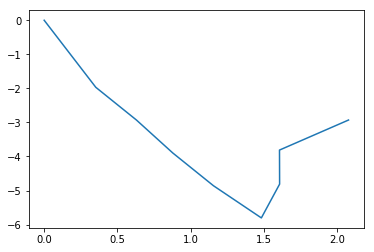

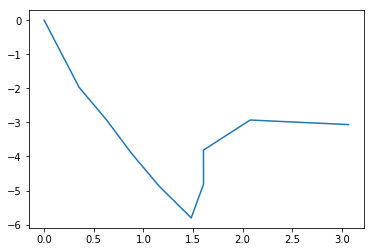

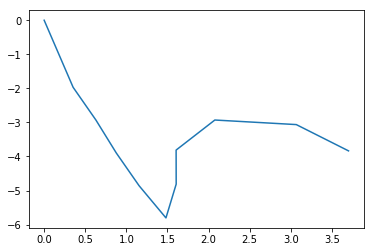

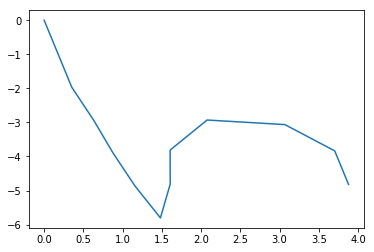

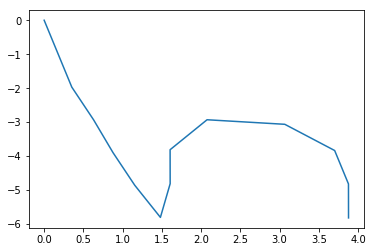

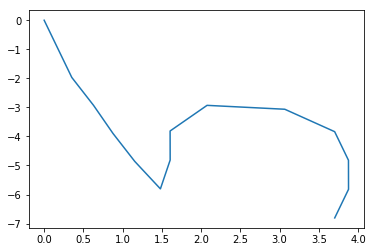

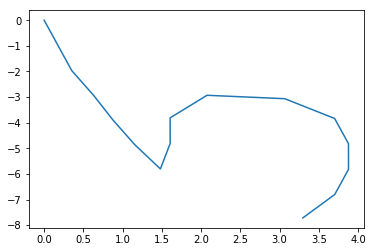

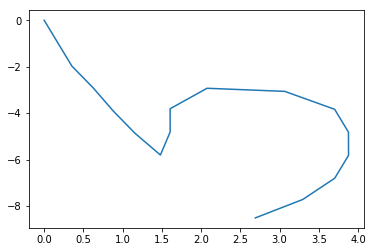

In [4]:
#teste
t=tracerLettre(X[20])

# Apprentissage d'un modèle CM (max de vraisemblance)

# 1. Discrétisation

In [5]:
def discretise(X,d):
    l= list()
    for x in X: 
        intervalle = 360./d
        l.append(np.floor(x/intervalle))
        
    return l

In [6]:
#teste
xd= discretise(X,3)
print(xd[0])

[ 0.  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.
  0.  0.  0.  0.  0.]


In [7]:
#xd

In [8]:
#teste
xd= discretise(X,3)
print(xd[0])

[ 0.  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.
  0.  0.  0.  0.  0.]


# 2. Regrouper les indices des signaux par classe (pour faciliter l'apprentissage)

In [9]:
def groupByLabel(y):
    index = []
    for i in np.unique(y): # pour toutes les classes
        ind, = np.where(y==i)
        index.append(ind)
    return index
3 
pi 0 1 2 

In [12]:
#teste
index = groupByLabel(Y) #Chaque ligne regroupe les indices de signaux correspondant à une classe 

In [17]:
index

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype=int64),
 array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], dtype=int64),
 array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype=int64),
 array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54], dtype=int64),
 array([55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65], dtype=int64),
 array([66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76], dtype=int64),
 array([77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87], dtype=int64),
 array([88, 89, 90, 91, 92, 93, 94, 95, 96, 97], dtype=int64),
 array([ 98,  99, 100, 101, 102, 103, 104, 105, 106, 107], dtype=int64),
 array([108, 109, 110, 111, 112, 113, 114, 115, 116, 117], dtype=int64),
 array([118, 119, 120, 121, 122, 123, 124, 125, 126, 127], dtype=int64),
 array([128, 129, 130, 131, 132, 133, 134, 135, 136, 137], dtype=int64),
 array([138, 139, 140, 141, 142, 143, 144, 145, 146, 147], dtype=int64),
 array([148, 149, 150, 151, 152, 153

In [16]:
#xd

# 3. Apprendre les modèles CM

In [11]:
def learnMarkovModel(Xc, d):
    #initialisation:
    A = np.zeros((d,d))
    Pi = np.zeros(d)
    
    for i in Xc:
        
        
        
        A = A/np.maximum(A.sum(1).reshape(d,1),1) # normalisation
        Pi = Pi/Pi.sum()
    #return A,Pi   

In [146]:
#teste 
d=3
Xc= discretise(X,d)
learnMarkovModel(Xc,d)


C:\Users\kherf\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
